In [1]:
import sys
import os

from functools import partial
import random

import geopandas as gpd
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from gerrychain import (
    Election,
    Graph,
    MarkovChain,
    Partition,
    GeographicPartition,
    accept,
    constraints,
    updaters,
    tree
)

from gerrychain.metrics import efficiency_gap, mean_median
from gerrychain.proposals import recom, propose_random_flip
from gerrychain.updaters import cut_edges
from gerrychain.tree import recursive_tree_part, bipartition_tree_random, PopulatedGraph, \
                            find_balanced_edge_cuts_memoization, random_spanning_tree
import maup

import networkx as nx

sys.path.insert(0, '/Users/rowanaahmed/Documents/DSSG/dssg2021-redistricting/')
import utility_functions

import warnings 
warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)

In [2]:
state_gdf = gpd.read_file("Data/TX_VTDs_POP2019/texas_population2019.shp")
graph = Graph.from_file("Data/TX_VTDs_POP2019/texas_population2019.shp")

prec_counts = pd.read_csv('Data/mean_prec_vote_counts.csv')

/Users/rowanaahmed/opt/anaconda3/envs/gerry_chain/lib/python3.9/site-packages/gerrychain/graph/adjacency.py:66: UserWarning: Found overlaps among the given polygons. Indices of overlaps: {(1165, 1170), (7889, 8135), (603, 762), (638, 695), (6531, 6548), (6573, 6618), (7539, 7582), (763, 1812), (3500, 3510), (499, 735), (6519, 6537), (5970, 8790), (628, 629), (3871, 3886), (5974, 8790), (1159, 1168), (2981, 8790), (1806, 3877), (1114, 1154), (612, 733), (445, 446), (873, 982), (605, 639), (3496, 3505), (1663, 1686), (824, 860), (1163, 1165), (2930, 2938), (657, 658), (904, 978), (1478, 1479), (2801, 2818), (6551, 6580), (1478, 1488), (1577, 1683), (2875, 2904), (2811, 2813), (2805, 2827), (1661, 1728), (2876, 2878), (5414, 6142), (8780, 8792), (656, 714), (7457, 7526), (3505, 3510), (324, 387), (1761, 1769), (1636, 1671), (322, 344), (2984, 8790), (4608, 6563), (2817, 2828), (6539, 6608), (6591, 6609), (2778, 2818), (3544, 3550), (8743, 8748), (572, 5833), (595, 758), (362, 6405), (1113

In [20]:
df_2010

,Unnamed: 0,Latino_state,Black_state,Distinct_state,Latino_equal,Black_equal,Distinct_equal,Latino_dist,Black_dist,Distinct_dist,Cut Edges,County Splits
0,0,6,5,10,7,4,9,NaN,NaN,NaN,2525,103
1,1,6,5,10,7,4,9,NaN,NaN,NaN,2527,103
2,2,6,5,10,7,4,9,NaN,NaN,NaN,2529,103
3,3,6,5,10,7,4,9,NaN,NaN,NaN,2537,104
4,4,6,4,9,6,4,9,NaN,NaN,NaN,2536,104
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,6,6,11,6,6,11,NaN,NaN,NaN,2324,101
996,996,6,6,11,6,6,11,NaN,NaN,NaN,2331,100
997,997,6,6,11,6,6,11,NaN,NaN,NaN,2336,100
998,998,6,6,11,6,6,11,NaN,NaN,NaN,2335,99


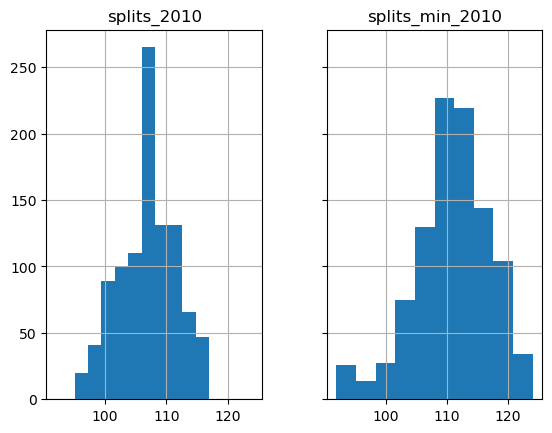

In [18]:
df_2010 = pd.read_csv('Outputs/map_metric_Texas_2010_run.csv')
df_2010_min_split = pd.read_csv('Outputs/map_metric_Texas_2010_run_county_aware_prop.csv')

df = pd.DataFrame({'effective_2010': df_2010['County Splits'], 
                   'effective_min_2010': df_2010_min_split['County Splits']})
df.hist(sharex = True, sharey=True)
plt.show()



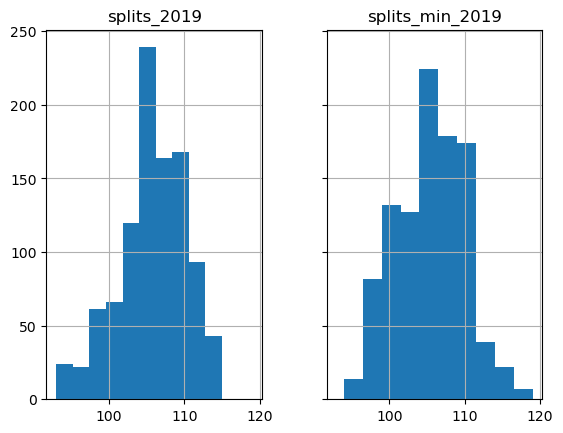

In [19]:
df_2019 = pd.read_csv('Outputs/map_metric_Texas_2019_run.csv')
df_2019_min_split = pd.read_csv('Outputs/map_metric_Texas_2019_run_county_aware_prop.csv')

df = pd.DataFrame({'splits_2019': df_2019['County Splits'], 
                   'splits_min_2019': df_2019_min_split['County Splits']})
df.hist(sharex = True, sharey=True)
plt.show()